# TP2 - Ejercicio 1

## Consignas
A partir de la plantilla de atenuación de un filtro pasabajos y las siguientes especificaciones se pide:

![Plantilla](img/ej2_plantilla.JPG)

![Especificaciones](img/ej2_especificaciones.JPG)

* Determinar el orden del filtro para máxima planicidad.
* Determinar la ubicación de los polos y el Q asociado a los mismos.
* Diseñar los filtros si se pretende una ganancia de $20dB$ en la banda de paso, utilizando estructura Sallen-Key (SK).
* Verificar mediante simulación los circuitos obtenidos.

## Resolución

Pasamos la plantilla al dominio de la frecuencia angular y aplicamos una norma de impedancia $\Omega_\omega = 2\pi . f_s$

<div><img src="img/ej2_plantilla_normalizada.jpeg" width="500"/></div>

La aproximación de máxima planicidad es:

$|T(j\omega)|^2 = \frac{1}{1 + \epsilon^2 . \omega^{2 . n}}$

Debemos averiguar:

* El valor de $\epsilon$
* El valor de $n$ (el orden)

Para hallar $\epsilon$ despejamos de la función de aproximación cuando $\omega = 1$ y $\alpha = \alpha_{max}$
$\epsilon^2 = 10^{\frac{\alpha_{max}}{10}} - 1 $

In [1]:
import numpy as np

ee = 10**(0.5/10)-1
e = np.sqrt(ee)

print(f'ee: {ee}')
print(f'e: {e}')

ee: 0.12201845430196334
e: 0.34931140018894796


$\epsilon^2 = 0,122$

$\epsilon = 0,3493$

Una vez obtenido el valor de $\epsilon$ se puede averiguar el orden ($n$) iterando en la funcion de aproximación con $\omega = \omega_s$ hasta alcanzar un valor de atenuación que sea mayor o igual al $\alpha_{min}$

In [2]:
ws = 2

for n in range(1,6):
    alpha = 1 + ee * ws**(2*n)
    print(f'alpha(n = {n}) = {alpha}')

alpha(n = 1) = 1.4880738172078534
alpha(n = 2) = 2.9522952688314135
alpha(n = 3) = 8.809181075325654
alpha(n = 4) = 32.236724301302615
alpha(n = 5) = 125.94689720521046


Se puede observar que el mínimo valor de orden que cumple con el requisito de $\alpha_{min}$ es $n = 4$.

Una vez hallado el orden, la función de aproximación queda:

$|T(j\omega)|^2 = \frac{1}{1 + \epsilon^2 . \omega^{2 . 4}}$

$|T(j\omega)|^2 = \frac{1}{1 + \epsilon^2 . \omega^8}$

Podemos considerar la expresión como:

$|T(j\omega)|^2 = \frac{1}{1 + \frac{\omega^8}{\epsilon^{-\frac{2}{8}}}}$

Donde consideramos $\frac{1}{\epsilon^2}$ como otra normalización. Por ende la transferencia queda:


${|T(s)|^2}_{\omega = \frac{s}{j}} = \frac{1}{1 + (\frac{s}{j})^8}$

$j^8 = 1$

${|T(s)|^2} = \frac{1}{1 + s^8}$



In [3]:
den = [1, 0, 0, 0, 0, 0, 0, 0, 1]
raices = np.roots(den)

# nos quedamos solamente con los polos del semiplano izquierdo
for raiz in raices:
    if np.real(raiz) < 0:
        print(raiz)

(-0.9238795325112878+0.38268343236509j)
(-0.9238795325112878-0.38268343236509j)
(-0.3826834323650902+0.9238795325112873j)
(-0.3826834323650902-0.9238795325112873j)


La función transferencia puede expresarse como:

$T(s) = \frac{1}{[s + (0,9238+j0,3826)] . [s + (0,9238-j0,3826)] . [s + (0,3826+j0,9238)] . [s + (0,3826-j0,9238)]}$

Agrupandolo en 2 transferencias correspondientes a los pares de polos conjugados:

$T(s) = \frac{1}{s^2 + s . 1,8476 + 1} . \frac{1}{s^2 + s . 0,7652 + 1}$

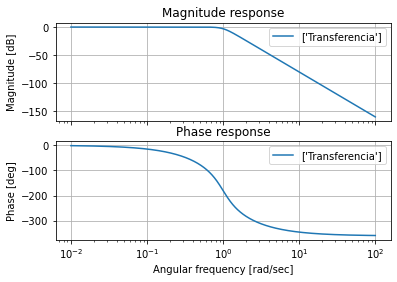

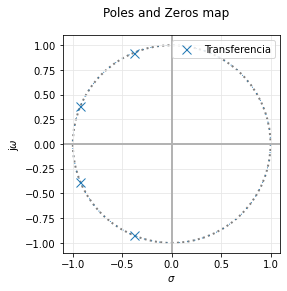

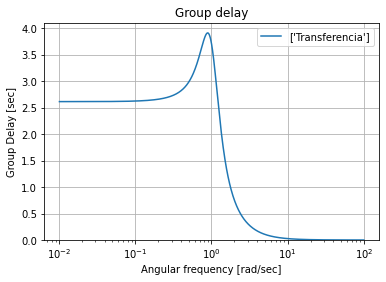

In [4]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from splane import analyze_sys

num = [1]
den = [1, 2.6128, 3.4137, 2.6128, 1]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

En el análisis de la transferencia marca $-3dB$ en $\omega=1$ ya que aplicamos la renormalización de $\epsilon$

Recordando que la expresión de la transferencia de un pasa-bajos puede expresarse como:

$T(s) = \frac{\omega_0^2}{s^2 + s . \frac{\omega_0}{Q}+ \omega_0^2}$

Para determinar el valor de $Q$ asociado a cada par de polos, planteamos:

En ambas etapas:

$\omega_0^2 = 1$

$\omega_0 = 1$

Etapa 1:

$\frac{\omega_0}{Q} = 1,8476$

$Q = \frac{1}{1,8476} = 0,5412$

Etapa 2:

$\frac{\omega_0}{Q} = 0,7652$

$Q = \frac{1}{0,7652} = 1,3$

## Diseño del filtro con estructura SK

La estructura SK tiene la siguiente forma:

![Estructura_SK](img/ej2_estructura_sk.JPG)

Considerando:

* $R_1 = R_2 = R$
* $R_3 = R_a$
* $R_4 = R_b$

Las ecuaciones de diseño de esta estructura son:

$K = 1 + \frac{R_b}{R_a}$

$Q = \frac{\sqrt{C_1 . C_2}}{2 . C_2 + C_1 . (1 - K)}$

$\omega_p = \frac{1}{R . \sqrt{C_1 . C_2}}$

Adoptando las siguientes condiciones:

* $R = 1$
* $C_1 = n . C$
* $C_2 = C$

Partiendo de la expresión de la frecuencia, considerando que está normalizada ($\omega_p = 1$):

$1 = \frac{1}{C .\sqrt{n}}$

$C = \frac{1}{\sqrt{n}}$

$n = \frac{1}{C^2}$

Entonces:

* $C_1 = \frac{1}{C}$
* $C_2 = C$

Partiendo de la expresión de Q:

$Q = \frac{\sqrt{C_1 . C_2}}{2 . C_2 + C_1 . (1 - K)}$

$Q = \frac{C . \sqrt{n}}{C . (2 . n + (1 - K))}$

$Q = \frac{\sqrt{n}}{(2 . n + (1 - K))}$

$Q = \frac{1}{C} . \frac{1}{2 . \frac{1}{C^2} + (1 - K)}$

$Q = \frac{1}{2 . \frac{1}{C} + C . (1 - K)}$

$Q = \frac{C . }{2 + C^2 . (1 - K)}$

$C^2 . (1 - K) . Q - C + 2 . Q = 0$


Para tener $20dB$ de amplificación, la ganancia en veces debe ser $10$. Repartiendo esta ganancia equitativamente en cada etapa como $K_1 = K_2 = \sqrt{10} = 3,1622$.

Para la etapa 1:

$Q_1 = 0,5412$

In [5]:
Q1 = 0.5412
K1 = 3.1622

a = (1 - K1) * Q1
b = -1
c = 2*Q1

raices = np.roots([a, b, c])

# Nos quedamos con el resultado positivo ya que es el que tiene sentido para determinar el valor del capacitor
for raiz in raices:
    if raiz > 0:
        print(f'C: {raiz}')

C: 0.6251207559869218


Para la etapa 2:

$Q_2 = 1,3$

In [6]:
Q2 = 1.3
K2 = 3.1622

a = (1 - K2) * Q2
b = -1
c = 2*Q2

raices = np.roots([a, b, c])

# Nos quedamos con el resultado positivo ya que es el que tiene sentido para determinar el valor del capacitor
for raiz in raices:
    if raiz > 0:
        print(f'C: {raiz}')

C: 0.8001909088181162


Para la etapa 1:

* $R_1 = R_2 = R_3 = R = 1$
* $R_4 = K - 1 = 2,16$
* $C_1 = \frac{1}{C} = 1,6$
* $C_2 = C = 0,6251$

Para la etapa 2:

* $R_1 = R_2 = R_3 = R = 1$
* $R_4 = K - 1 = 2,16$
* $C_1 = \frac{1}{C} = 1,25$
* $C_2 = C = 0,8$


In [11]:
# Desnormalizamos los componentes
fc = 1000
Ww = 2*np.pi*fc
We = e**(-1/4)
Wz = 1000

# Etapa 1
R11_n = 1
R12_n = 1
R13_n = 1
R14_n = 2.16
C11_n = 1.6
C12_n = 0.6251

R11_dn = R11_n * Wz
R12_dn = R12_n * Wz
R13_dn = R13_n * Wz
R14_dn = R14_n * Wz
C11_dn = C11_n / (Ww * Wz * We)
C12_dn = C12_n / (Ww * Wz * We)

print(f'Etapa 1 - R1: {R11_dn}')
print(f'Etapa 1 - R2: {R12_dn}')
print(f'Etapa 1 - R3: {R13_dn}')
print(f'Etapa 1 - R4: {R14_dn}')
print(f'Etapa 1 - C1: {C11_dn}')
print(f'Etapa 1 - C2: {C12_dn}')


# Etapa 2
R21_n = 1
R22_n = 1
R23_n = 1
R24_n = 2.16
C21_n = 1.25
C22_n = 0.8

R21_dn = R21_n * Wz
R22_dn = R22_n * Wz
R23_dn = R23_n * Wz
R24_dn = R24_n * Wz
C21_dn = C21_n / (Ww * Wz * We)
C22_dn = C22_n / (Ww * Wz * We)

print('\n')
print(f'Etapa 2 - R1: {R21_dn}')
print(f'Etapa 2 - R2: {R22_dn}')
print(f'Etapa 2 - R3: {R23_dn}')
print(f'Etapa 2 - R4: {R24_dn}')
print(f'Etapa 2 - C1: {C21_dn}')
print(f'Etapa 2 - C2: {C22_dn}')

Etapa 1 - R1: 1000
Etapa 1 - R2: 1000
Etapa 1 - R3: 1000
Etapa 1 - R4: 2160.0
Etapa 1 - C1: 1.9576872131584303e-07
Etapa 1 - C2: 7.648439230908341e-08


Etapa 2 - R1: 1000
Etapa 2 - R2: 1000
Etapa 2 - R3: 1000
Etapa 2 - R4: 2160.0
Etapa 2 - C1: 1.5294431352800235e-07
Etapa 2 - C2: 9.788436065792151e-08


## Simulación

Circuito simulado en 2 etapas con estructuras SK:

![Circuito_activado](img/ej2_circuito_desnormalizado.JPG)

![Transferencia](img/ej2_transferencia_desnormalizada.JPG)

Al medir con los cursores, se puede observar que el filtro cumple con la ganancia en la banda de paso, pero no cumple con la atenuación mínima en la banda de stop.

![Cursores](img/ej2_transferencia_cursores.JPG)

En la frecuencia de paso, cumple con la atenuación máxima

![Cursor_2](img/ej2_transferencia_cursores_2.JPG)